<a href="https://colab.research.google.com/github/OrlandoDF/Analise_de_dados_AirBnb_de_Amsterdam_para_Investimentos_Imobiliarios/blob/main/11_%5BTemplate%5D_Analisando_os_Dados_do_Airbnb_Amsterdam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Amsterdam*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Amsterdam, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2022-09-07/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* id = número de identificação do imóvel gerado pelo AirBnb
* name = nome do imóvel anunciado
* host_id =  número de identificação (proprietário) do imóvel anunciado
* host_name = nome do proprietário do imóvel
* neighbourhood_group = esta coluna não contém valor válido
* neighbourhood = nome do bairro
* latitude = localização em graus decimais em relação aos trópicos
* longitude = localização em graus decimais em relação aos meridianos
* room_type = informa o tipo de quarto que é fornecido
* price = valor da diário do quarto oferecido
* minimum_nights = diárias mínimas para locação
* number_of_reviews = número de reviews (visualizações) que a propriedade possui
* last_reviews = última data do review
* reviews_per_month = reviews por mês
* calculated_host_listings_count = quantidade de imóveis com o mesmo anfitrião
* availability_365 = número de disponibilidades de locação no ano
* number_of_reviews_ltm = número de avaliações publicadas
* license = código da licença do imóvel/proprietário

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,49,3,305,2022-08-30,1.86,1,14,25,0363 5F3A 5684 6750 D14D
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,106,1,339,2020-04-09,2.22,2,0,0,0363 CBB3 2C10 0C2A 1E29
2,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,136,2,231,2022-04-24,1.78,1,121,8,0363 974D 4986 7411 88D8
3,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36775,4.89092,Private room,75,2,428,2022-08-24,2.92,2,117,75,0363 607B EA74 0BD8 2F6F
4,29051,Comfortable single room,124245,Edwin,NaN,Centrum-Oost,52.36584,4.89111,Private room,55,2,582,2022-08-29,4.16,2,160,86,0363 607B EA74 0BD8 2F6F


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

* O data frame do conjunto de dados do AirBnb de Amsterdam, possui 6.893 entradas e 18 variáveis. As variáveis estão descritas no dicionário de variáveis no início da colab!
* Os tipos de variáveis são inteiro, object e float. As variáveis inteiro está ligado ao id, host_id, price, minimum_nights, number_of_reviews, calculated_host listings_count, availibility_365 e number_of_reviews_ltm. Variável tipo object são name, host_name, neighbourhood, room_type, last_review e licence. A varíavel float são: neighbourhood_group, latitude, longitude, reviews_per_month.

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:{}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset

display(df.dtypes)

Entradas:6893
Variáveis:	 18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Os dados extraídos do DataFrame (df) possui:
* 100% na variável neighbourhood_group;
* 9% na variável reviews_per_month;
* 9% na variável last_review;
* 6% license.

A ausência de 100% na variável neighbourbood_group, extrai a informação que não possui um grupo de bairro, ou seja, um bairro que engloba outros bairros menores.

As outras variáveis não possuem valores ausentes.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)



neighbourhood_group               1.000000
reviews_per_month                 0.093718
last_review                       0.093718
license                           0.064413
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

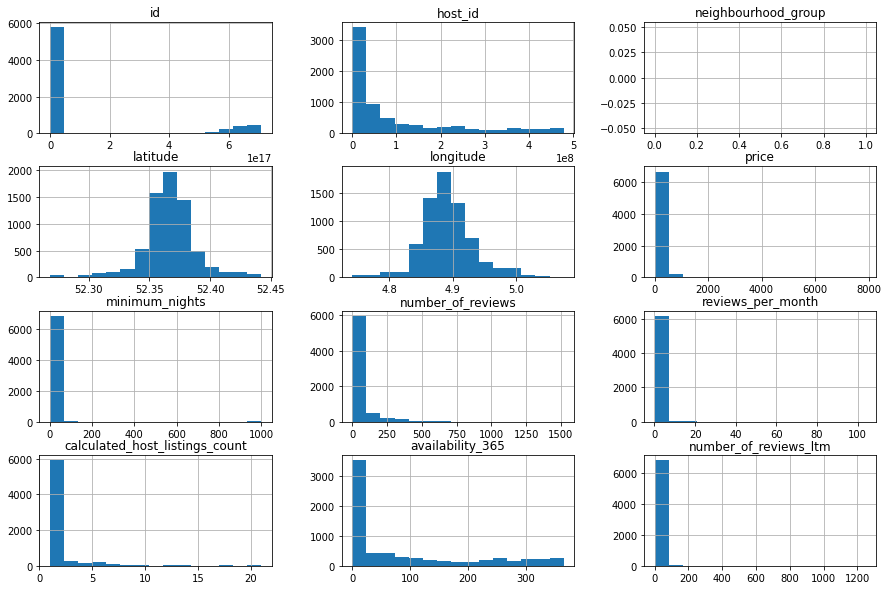

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

* A média dos preços do aluguel é de $ 218,00

In [ ]:
# ver a média da coluna `price``
df[['price']].describe()

,price
count,6893.000000
mean,218.487306
std,192.576328
min,0.000000
25%,125.000000
50%,180.000000
75%,264.000000
max,7900.000000


### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação
corr = df[['price','minimum_nights','number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.007709,-0.134198,-0.051069,0.043523,0.137029
minimum_nights,0.007709,1.000000,-0.022193,-0.011235,0.001116,-0.007035
number_of_reviews,-0.134198,-0.022193,1.000000,0.641480,0.026443,0.200751
reviews_per_month,-0.051069,-0.011235,0.641480,1.000000,0.101439,0.247520
calculated_host_listings_count,0.043523,0.001116,0.026443,0.101439,1.000000,0.302557
availability_365,0.137029,-0.007035,0.200751,0.247520,0.302557,1.000000


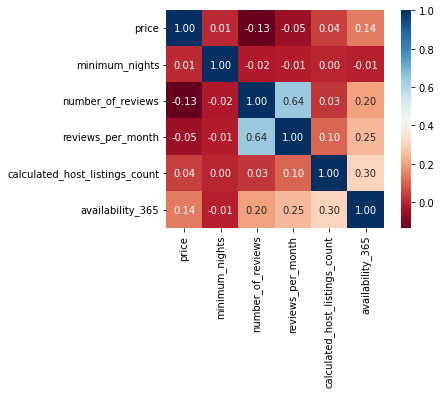

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    4922
Private room       1859
Hotel room           75
Shared room          37
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0]

Entire home/apt    0.714058
Private room       0.269694
Hotel room         0.010881
Shared room        0.005368
Name: room_type, dtype: float64

De acordo com os dados, o imóvel mais alugado é apartamento ou casa num percentual de 71% das locações (4.922 de 6.893). Em relação a locação de um quarto são 26% das locações (1859 de 6893), 1% locação de hotel (75 de 6893) e 0,5% de quartos compartilhados!

### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:18]

neighbourhood
Centrum-West                              273.014640
Centrum-Oost                              260.195276
Zuid                                      239.644860
De Pijp - Rivierenbuurt                   239.147887
Oud-Noord                                 221.248276
De Baarsjes - Oud-West                    215.726274
Westerpark                                209.440980
IJburg - Zeeburgereiland                  207.714286
Geuzenveld - Slotermeer                   202.530973
Buitenveldert - Zuidas                    198.195804
Oud-Oost                                  194.827493
Watergraafsmeer                           192.967742
De Aker - Nieuw Sloten                    186.222222
Oostelijk Havengebied - Indische Buurt    184.123404
Bos en Lommer                             179.542208
Noord-West                                174.153465
Osdorp                                    172.246154
Slotervaart                               169.524590
Name: price, dtype: float64

Em relação ao dataset, o Centrum-West é a localidade mais cara, seguida de Centrum-Oost, Zuid. Variando o preço médio em $273 a 198 (Buitenveldert - Zuidas). 
Portanto vamos verificar a quantidade de imóveis que são locados nas regiões de Amsterdam


In [ ]:
# quantidade de locação 
print(df[df.neighbourhood == "Centrum-West"].shape) 
print(df[df.neighbourhood == "Centrum-Oost"].shape)
print(df[df.neighbourhood == "Zuid"].shape)
print(df[df.neighbourhood == "De Pijp - Rivierenbuurt"].shape)
print(df[df.neighbourhood == "Oud-Noord"].shape)
print(df[df.neighbourhood == "Westerpark"].shape)
print(df[df.neighbourhood == "IJburg - Zeeburgereiland"].shape)
print(df[df.neighbourhood == "Geuzenveld - Slotermeer"].shape)
print(df[df.neighbourhood == "Buitenveldert - Zuidas"].shape)
print(df[df.neighbourhood == "Oud-Oost"].shape)
print(df[df.neighbourhood == "Watergraafsmeer"].shape)
print(df[df.neighbourhood == "De Aker - Nieuw Sloten"].shape)
print(df[df.neighbourhood == "Oostelijk Havengebied - Indische Buurt"].shape)
print(df[df.neighbourhood == "Bos en Lommer"].shape)
print(df[df.neighbourhood == "Noord-West"].shape)
print(df[df.neighbourhood == "Osdorp"].shape)
print(df[df.neighbourhood == "Slotervaart"].shape)
# 3 primeiras entradas
(df[df.neighbourhood == "Centrum-West"])

(888, 18)
(635, 18)
(428, 18)
(710, 18)
(290, 18)
(449, 18)
(175, 18)
(113, 18)
(143, 18)
(371, 18)
(248, 18)
(90, 18)
(235, 18)
(308, 18)
(202, 18)
(65, 18)
(122, 18)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
2,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.387610,4.891880,Private room,136,2,231,2022-04-24,1.78,1,121,8,0363 974D 4986 7411 88D8
3,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.367750,4.890920,Private room,75,2,428,2022-08-24,2.92,2,117,75,0363 607B EA74 0BD8 2F6F
6,49552,Multatuli Luxury Guest Suite in top location,225987,Joanna & MP,NaN,Centrum-West,52.380280,4.890890,Entire home/apt,245,3,433,2022-09-05,3.00,1,165,58,0363 576A D827 5085 6B83
7,50523,B & B de 9 Straatjes (city center),231946,Raymond,NaN,Centrum-West,52.368110,4.882620,Private room,124,2,346,2022-08-21,2.43,1,236,37,0363 22DC 0E52 B70B 0FB8
11,80635,TOP LOCATED Canalhouse B&B Jordaan,436145,Riks,NaN,Centrum-West,52.378280,4.894400,Private room,82,3,228,2021-11-01,1.63,4,0,4,0363 4108 6EC3 C2FF 2493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6352,705331431297333740,Bed and Breakfast,477473886,Casper,NaN,Centrum-West,52.365700,4.885283,Entire home/apt,235,3,0,NaN,NaN,1,18,0,Hsdh 6485 FE52 84FG C2W3
6369,707055540213932758,Mooi appartement in barcelona,477810650,Fannie,NaN,Centrum-West,52.371454,4.897313,Entire home/apt,507,4,0,NaN,NaN,1,34,0,Hkel 1542 BG03 56DF S5A0
6372,708295967090178007,Riches and honour apartment,478047264,Imke,NaN,Centrum-West,52.370864,4.888149,Entire home/apt,334,4,0,NaN,NaN,1,14,0,Hsdh 5465 sd65 54fg h6h5
6375,708475499003098001,Typical Amsterdam Canal View Apartment - Jordaan,30473772,Charlotte,NaN,Centrum-West,52.382178,4.886252,Entire home/apt,650,2,0,NaN,NaN,1,5,0,0363 4F66 9500 45B8 F178


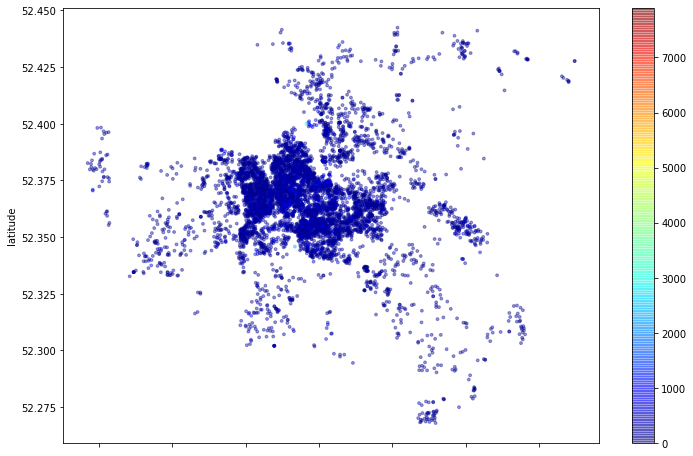

In [ ]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8)) 

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df[['minimum_nights']].describe()

,minimum_nights
count,6893.000000
mean,5.180183
std,38.826489
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,1001.000000


A média de quantidade mínima do aluguel é de 5 noites. Presupoe esta quantidade de dias devidos a exploração do turismo e eventos!

## Conclusões


Analisando os dados de locação dos imóveis pelo AirBnb em Amsterdam, extrai as seguintes informações:


*   O valor médio de locação é de 218,00 Euros. 
*   Mais de 70% das locações são para apartamentos ou casas, seguido de quartos privativos, hotel e por fim quartos compartilhados.
*   A região mais cara de acordo com a média dos preços por bairros é a de Centrum-West.
*   A média de diárias alugadas é de 5 noites.

Esses dados extraídos a partir dos banco de dados, mostra a importância para profissionais da engenharia, aberturas de empreendimentos e negócios, as regiões mais procuradas e valorizadas no ambito de imóveis. Ou seja, um excelente negócio a investidores de imóveis para rentabilidade anual e valorização constante do imóvel para futura revenda. 


